In [5]:
from functions import *
from sklearn.linear_model import ElasticNet, Lasso, Ridge

In [2]:
data = load_data()

### Compare Lasso and Ridge regression


In [31]:
feature_names = data.columns[3:95]
X = data[feature_names]
Y = data["R1M_Usd"]
lambdas = np.linspace(0.001,0.0025,15) # notice that the alpha(lambda) in sklearn is twice as larges as the lambda in glmnet

In [12]:
# let's start with Lasso
betas = [Lasso(alpha=l).fit(X,Y).coef_ for l in lambdas]


In [13]:
beta_df = pd.DataFrame(betas, columns=feature_names,index=lambdas)
beta_df.head()

,Advt_3M_Usd,Advt_6M_Usd,Asset_Turnover,Bb_Yld,Bv,Capex_Ps_Cf,Capex_Sales,Cash_Div_Cf,Cash_Per_Share,Cf_Sales,...,Share_Turn_6M,Ta,Tev_Less_Mktcap,Tot_Debt_Rev,Total_Capital,Total_Debt,Total_Debt_Capital,Total_Liabilities_Total_Assets,Vol1Y_Usd,Vol3Y_Usd
0.001000,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.000127,0.000498
0.001107,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.000000,0.000000
0.001214,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.000000,0.000000
0.001321,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.000000,0.000000
0.001429,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.000000,0.000000


In [14]:
# Since most of coefficients are zeros let's keep the top 10 non-zero coefficients when lambda = 0
beta_df.sort_values(by=beta_df.index[0], axis=1,key=np.abs, inplace=True, ascending=False)
beta_df.head()

,Mkt_Cap_3M_Usd,Eps,Pb,Vol3Y_Usd,Mom_11M_Usd,Vol1Y_Usd,Ni,Ocf_Margin,Op_Prt_Margin,Op_Margin,...,Fa_Ci,Fcf_Tbv,Fcf_Ta,Fcf_Oa,Fcf_Noa,Fcf_Margin,Fcf_Ce,Fcf_Bv,Fcf,Nd_Ebitda
0.001000,-0.007867,-0.002434,-0.001532,0.000498,-0.000275,0.000127,-0.0,-0.0,-0.0,-0.0,...,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0
0.001107,-0.007443,-0.001648,-0.000456,0.000000,-0.000000,0.000000,-0.0,-0.0,-0.0,-0.0,...,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0
0.001214,-0.006670,-0.000680,-0.000000,0.000000,-0.000000,0.000000,-0.0,-0.0,-0.0,-0.0,...,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0
0.001321,-0.005632,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.0,-0.0,-0.0,-0.0,...,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0
0.001429,-0.004337,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.0,-0.0,-0.0,-0.0,...,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0


<Axes: title={'center': 'Lasso'}, xlabel='lambda', ylabel='beta'>

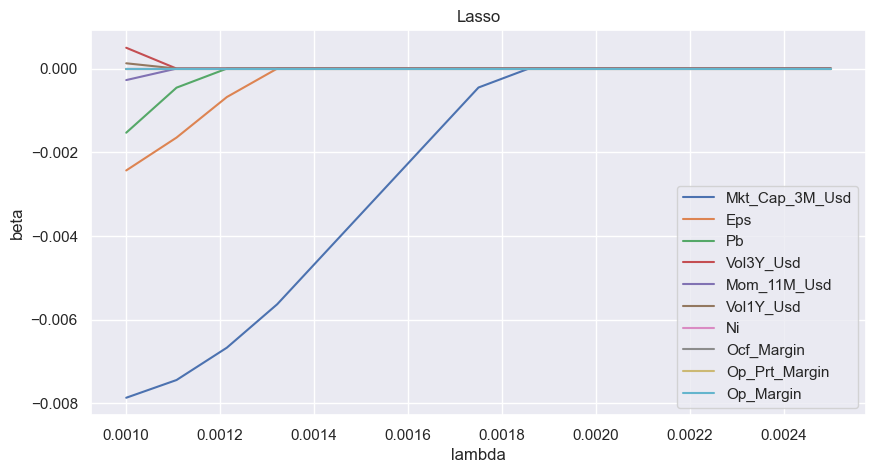

In [15]:
beta_df.plot(y=beta_df.columns[:10], xlabel="lambda", ylabel="beta", title="Lasso")

<Axes: title={'center': 'Ridge'}, xlabel='lambda', ylabel='beta'>

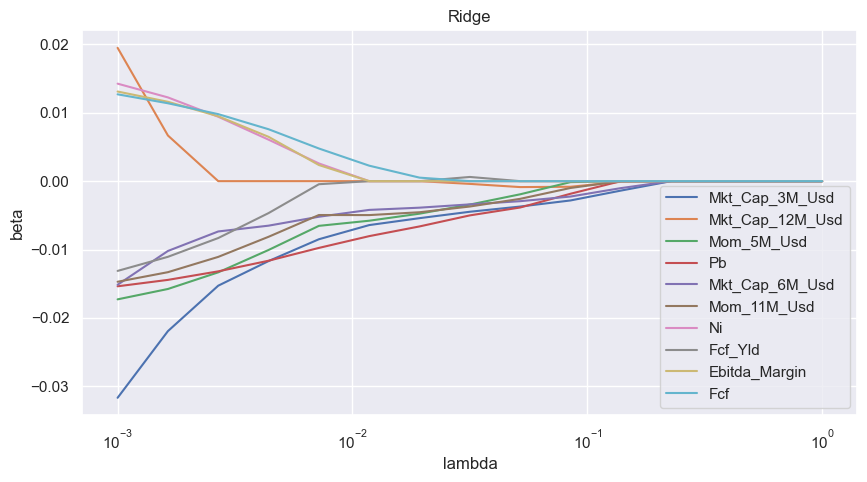

In [32]:
# similarly for Ridge regression
from sklearn.preprocessing import scale
lambdas = np.logspace(-3,0,15)
betas = [ElasticNet(l1_ratio=0.01, alpha=l).fit(X,Y).coef_ for l in lambdas]
beta_df = pd.DataFrame(betas, columns=feature_names,index=lambdas)
beta_df.sort_values(by=beta_df.index[0], axis=1,key=np.abs, inplace=True, ascending=False)
beta_df.plot(y=beta_df.columns[:10], logx=True, xlabel="lambda", ylabel="beta", title="Ridge")

Lasso is good at select important features while Ridge regression shrinks features all together toward zero.

### Predicate regression 

In [37]:
# we separate the data into train and test set. We train a linear regression model and test it in the test set.
separation_date = "2014-01-15"
train_sample = data[data.date<separation_date]
test_sample = data[data.date>=separation_date]

In [64]:
model = ElasticNet(l1_ratio=0.1, alpha=0.05)
model.fit(train_sample[feature_names], train_sample["R1M_Usd"])
y_predict = model.predict(test_sample[feature_names])
y_test = test_sample["R1M_Usd"]
# MSE on the test sample
MSE = np.mean((y_predict-y_test)**2)
# hit ratio: proportional times that the sign of return is predicted correctly
h_ratio = np.mean(y_predict*y_test > 0)
print(MSE)
print(h_ratio)

0.036996958091850024
0.5460346399270738


Notice that a h_ratio bigger than 50% does not mean a trader follow this system would be profitable. Risk-reward ratio is also important.

### Exercise

On the test sample evalue the impact of the two elastic net parameters on out-of-sample accuracy.

In [65]:
def score(l, a):
    model = ElasticNet(l1_ratio=l, alpha=a)
    model.fit(train_sample[feature_names], train_sample["R1M_Usd"])
    y_predict = model.predict(test_sample[feature_names])
    y_test = test_sample["R1M_Usd"]
    # MSE on the test sample
    MSE = np.mean((y_predict-y_test)**2)
    # hit ratio: proportional times that the sign of return is predicted correctly
    h_ratio = np.mean(y_predict*y_test > 0)
    return [MSE, h_ratio]

In [75]:
# let's first try different l1_ratios. This will tune model between Lasso and Ridge
l_ratios = np.logspace(-3,-1,10)
scores = [score(l, 0.05) for l in l_ratios]
df = pd.DataFrame(scores, index=l_ratios, columns=["MSE", "h_ratio"] )

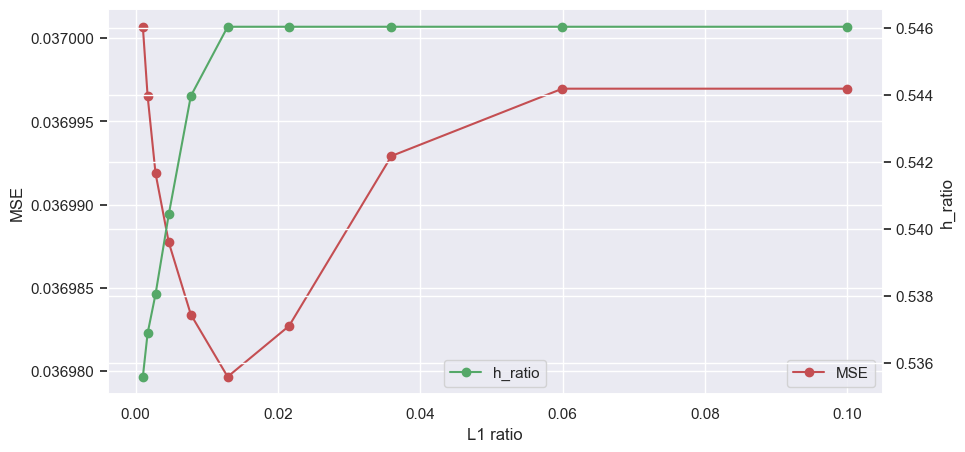

In [74]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.set_xlabel("L1 ratio")
ax.set_ylabel("MSE")
ax.plot(df.index, df.MSE,'o-r', label="MSE")
ax.legend(loc="lower right")
ax2.set_ylabel("h_ratio")
ax2.plot(df.index, df.h_ratio, 'o-g', label="h_ratio")
ax2.legend(loc="lower center")

Optimal L1 ratio reached around 0.01 further increase of it does not improve h_ratio and makes MSE worse

In [77]:
alpha_ratios = np.logspace(-3,-1,10)
scores = [score(0.01, a) for a in alpha_ratios]
df = pd.DataFrame(scores, index=alpha_ratios, columns=["MSE", "h_ratio"] )

In [67]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.set_xlabel("lambda")
ax.set_ylabel("MSE")
ax.plot(df.index, df.MSE,'o-r', label="MSE")
ax.legend(loc="lower right")
ax2.set_ylabel("h_ratio")
ax2.plot(df.index, df.h_ratio, 'o-g', label="h_ratio")
ax2.legend(loc="lower center")

,MSE,h_ratio
0.001000,0.037001,0.535594
0.001668,0.036997,0.536890
0.002783,0.036992,0.538058
0.004642,0.036988,0.540437
0.007743,0.036983,0.543969
0.012915,0.036980,0.546035
0.021544,0.036983,0.546035
0.035938,0.036993,0.546035
0.059948,0.036997,0.546035
0.100000,0.036997,0.546035
